# Part II - prosperLoanData Slide Deck
by Aruma Vivian C

# Investigation Overview

In the investigation ofprosperLoan data, my main variable of interest is Borrower's APR. I want to undesrstand what affects APR for a particular loan and its distribution in the dataset. I examined the relationship between APR and some other variables  such as APR vs. loanOriginalAmount and APR vs. rating, as well as Term effect. I explored the following categorical variables 'Occupation, 'LoanStatus', 'EmploymentStatus', 'Term', and 'ProsperRating (Alpha)'. The numeric variables that I explored are: 'BorrowerAPR',  'LoanOriginalAmount', and 'DebtToIncomeRatio'.

# Dataset Overview

prosperLoanData dataset is a csv file, it contains 113,937 rows(loans) with 81 variables on each row. The features(variables) includes amongst others Term, LoanOriginalAmount, Borrower's APR, loan status, 'ProsperRating (Alpha)', DebtToIncomeRatio, The dataset is provided by Udacity.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe
columns = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'Occupation', 'Recommendations']
loan_copy = loan[columns]

In [22]:
# group all values in "LoanStatus" containing "Past Due " and replace with "Past Due"
loan_copy.loc[loan_copy['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_copy[loan_copy['LoanStatus']=="Past Due"]

# set dtype of 'LoanStatus' to category
loanstatus_order = loan_copy['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_copy['LoanStatus'] = loan_copy['LoanStatus'].astype(ordered_var)


# set dtype of 'EmploymentStatus' to category
employ_order = loan_copy['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_copy['EmploymentStatus'] = loan_copy['EmploymentStatus'].astype(ordered_var)

# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_copy['Term'] = loan_copy['Term'].astype(ordered_var)

# set dtype of 'rating' to category
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_copy['ProsperRating (Alpha)'] = loan_copy['ProsperRating (Alpha)'].astype(ordered_var)

loan_copy.shape

# source code: shorturl.at/hjOQ3

(113937, 11)

# What is the Distribution of Borrower's APR?

There is obvious multimodal distribution observed at 0.1, 0.2, 0.3 and a sharp peak at about 0.37 followed by a sharp decline. There seems to be no loan awarded at a rate greater than 0.42

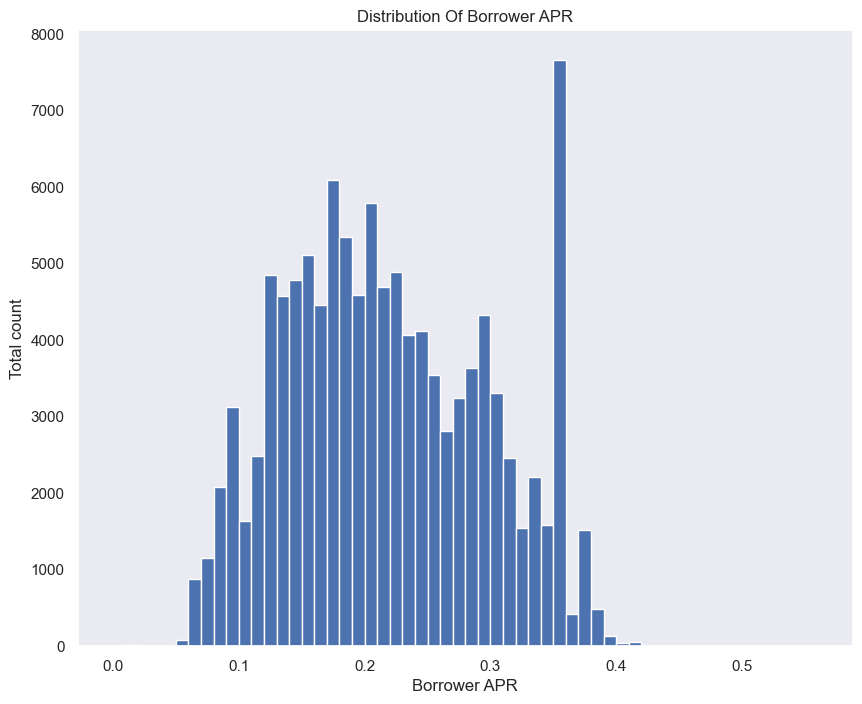

In [23]:
# visualize the distribution of Borrower's APR
# define a function to plot distribution of borrower's APR
def plot_x(data, x, x_label, y_label, title):
    plt.figure(figsize=[10,8])
    #creating a bin
    bins = np.arange(0, loan_copy.BorrowerAPR.max()+ 0.05, 0.01)
    plt.hist(data = loan_copy, x = x, bins = bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(False);

plot_x(data='loan_copy', x ='BorrowerAPR', x_label='Borrower APR',  y_label='Total count',
          title=('Distribution Of Borrower APR'))

#source code:https://review.udacity.com/#!/reviews/3960816

# 2. Check for the relationship  between Borrower's APR and Loan original amount

The scatter plot indicate a negative correlation between Borrower's APR and Loan Original amount. This implies an decrease in Borrower's APr(Interest rate) as loan amount increases

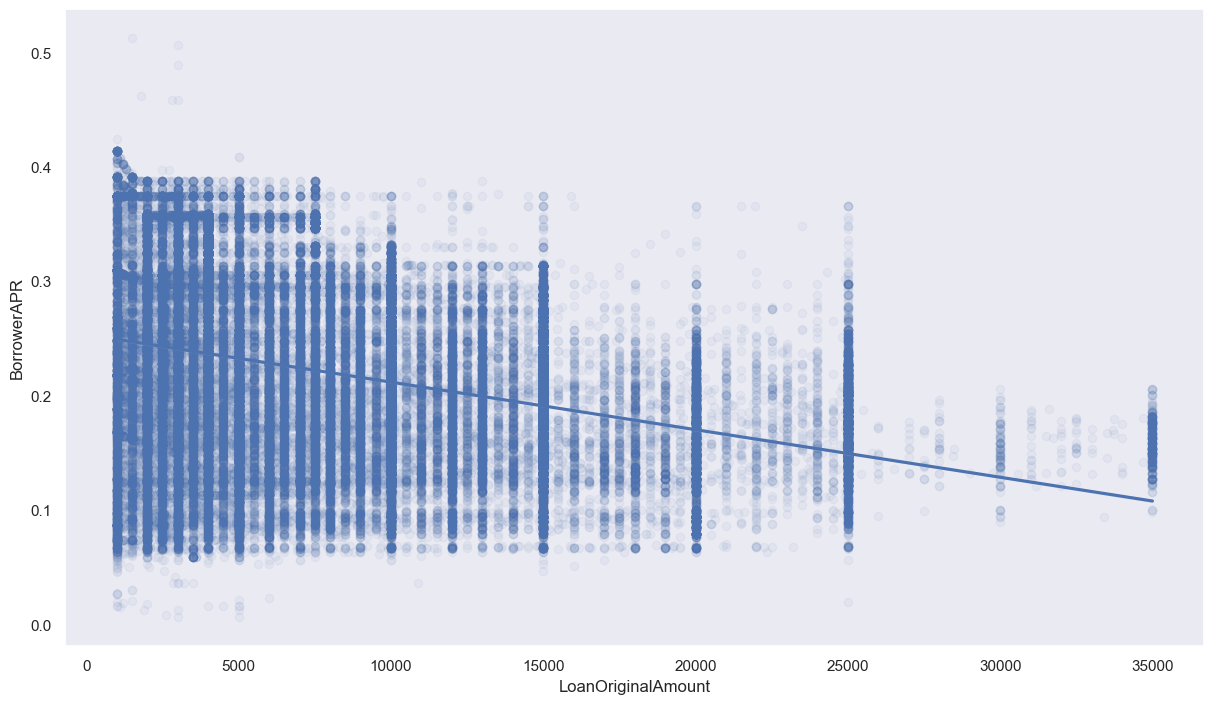

In [24]:
# Scatter plot


sns.set(rc = {'figure.figsize':(14.70,8.27)})
sns.regplot(data = loan_copy, x = 'LoanOriginalAmount', y = 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.grid(False);

# 3. The relationship between LoanStatus variable and other categorical variables

From the employment vs loan status, it is observed that majority of those employed have an ongoing(current) loan status and most people that are fulltime workers have completed the loan repayment. Majority of people on 36 and 60 months loan duration have their loan status as current whereas those on 12 months duration have their loan completed. The number of current loaners are more in all the scale of rating

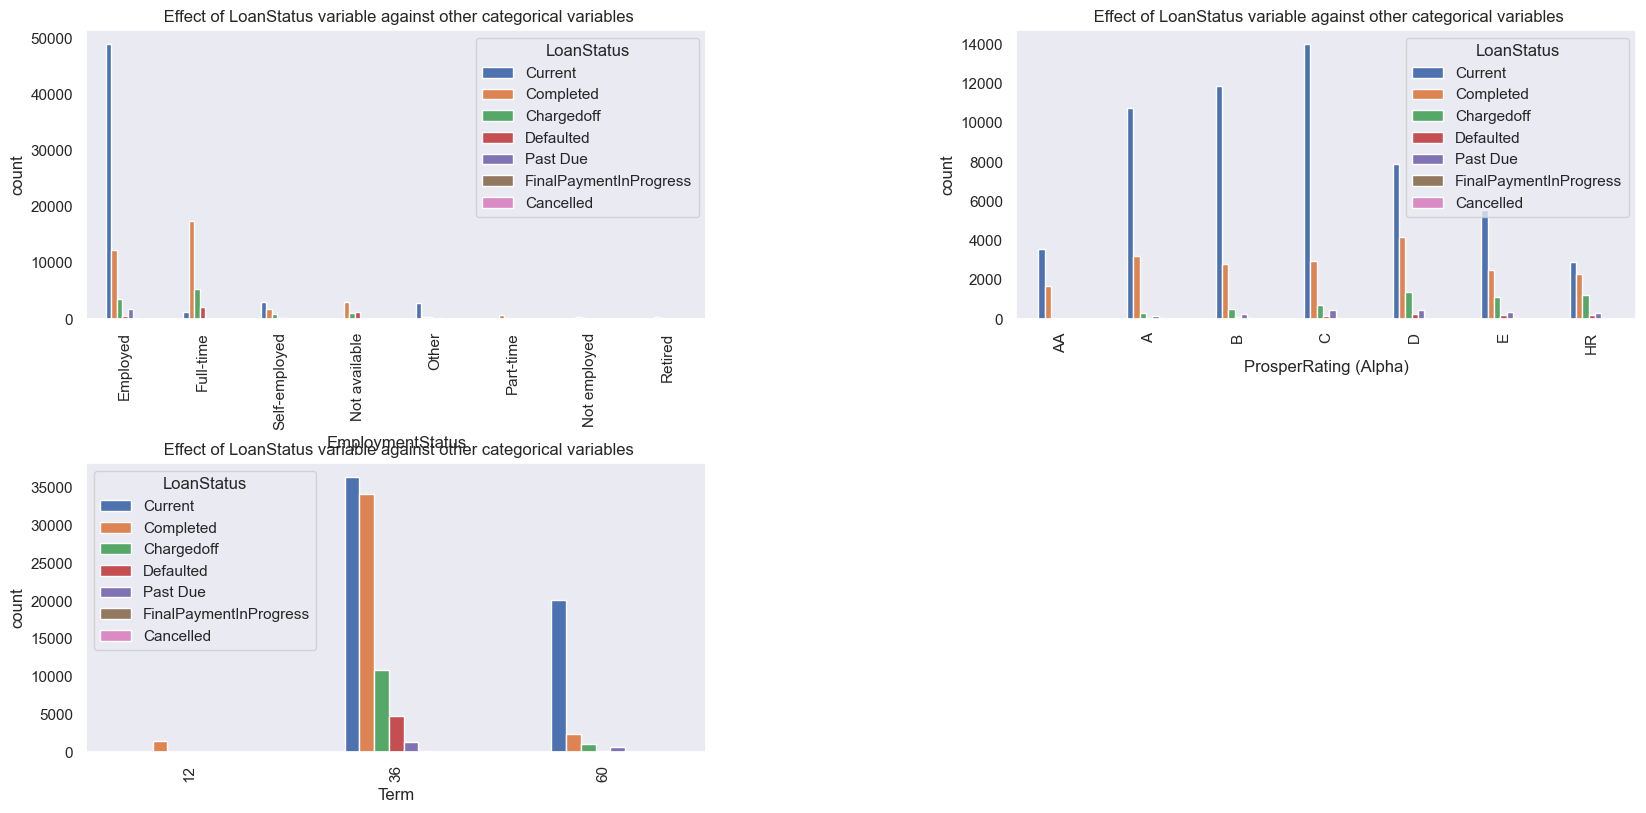

In [14]:
cat_var = ['EmploymentStatus', 'ProsperRating (Alpha)', 'Term']

fig = plt.figure(figsize=(20,15))
for i, var in enumerate(cat_var):
    ax = fig.add_subplot(3, 2, i+1)
    loan_copy.groupby([var, 'LoanStatus'])[var].count().unstack('LoanStatus').plot(ax=ax, kind='bar', stacked=False, title= ' Effect of LoanStatus variable against other categorical variables')
    plt.ylabel('count')
    plt.grid(False)
    plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5)
    
     #source code: https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb

In [ ]:
!jupyter nbconvert part_11_slide_deck.ipynb --to slides --post serve --no-input --no-prompt